## Mathmatical Methods For AI

In [1]:
file_path = '/Users/gaominquan/Workspace/AI-Foundation-Course/2020-python-programming-elementary/dataset/article_9k.txt'

## 上一节课的： 计算机可以通过数学模拟，来解决复杂问题

## 这一节课： 计算机中还有哪些重要的数学方法

+ 概率模型
+ 凸函数
+ SVM （支撑向量机）

## Problems: 

~~~~~~~ （这是一段音频）：语音识别

+ 今天的天气很好
+ 今天的天气很耗
+ 锦田的天气很好

## 计算语言学： 计算机来实现我们的语法判断

### 动名词，主谓宾，定状补

### 名词： 主语，不能做谓语

## Probability of a sentence => Language Model(语言模型）

$$ Pro(sentence) = Pr(w_1 w_2 w_3 .. w_n) = \prod_{1}^{n-1} Pr(w_i | w_{i+1}) * Pr(w_n) = \prod_{i=1}^{n-1} \frac{Pr(w_i w_{i+1})}{Pr(w_{i+1})} Pr(w_n)$$

In [2]:
whole_text = open(file_path).read()

In [4]:
import jieba

In [7]:
all_words = list(jieba.cut(whole_text))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/t4/cqwq7kjd23zb1pddhb8858rh0000gn/T/jieba.cache
Loading model cost 1.072 seconds.
Prefix dict has been built succesfully.


In [8]:
from collectionstionsections import Counter

In [9]:
word_counter = Counter(all_words)

In [50]:
word_counter['老实']

10

## Out of vocabulary OOV

In [69]:
def Pro_w(w):
    global all_words
#    _pro_w = word_counter[w] if w in word_counter else word_counter.most_common()[-1][1]
    _pro_w = oov_pro(w, word_counter)
    return _pro_w / len(all_words)

## 2-gram 

In [12]:
all_2_grams = [all_words[i] + all_words[i+1] for i in range(len(all_words)-1)]

In [13]:
all_2_grams[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [82]:
def oov_pro(w, counter):
    return counter[w] if w in counter else 1

In [83]:
counter_2_gram = Counter(all_2_grams)

def Pro_2_w(w1, w2):
    
    _pro_w = oov_pro(w1+w2, counter=counter_2_gram)
    
    return _pro_w / len(all_2_grams)

In [15]:
Pro_2_w('我们', '将')

3.473670176038453e-05

In [71]:
test_sentence = '今天的天气非常好'
test_sentence_2 = '今天的天气非常耗'

In [102]:
def prob_of_sentence(sentence):
    words = list(jieba.cut(sentence))
    
    prob = 1
    
    for i in range(len(words) - 1):
        _p =  (Pro_2_w(words[i], words[i+1]) / Pro_w(words[i+1]))
        print('combine prob of {} is {}:'.format(words[i]+words[i+1], _p))
        prob *= _p
        
    prob *= Pro_w(words[-1])
    
    return prob

In [103]:
prob_of_sentence(test_sentence)

combine prob of 今天的 is 0.0006110419891071201:
combine prob of 的天气 is 0.0468303852965528:
combine prob of 天气非常 is 0.00020173493176504272:
combine prob of 非常好 is 0.023913603825820636:


9.141579754038628e-14

In [30]:
prob_of_sentence(test_sentence_2)

0.0

In [72]:
test_sen_2 = '这是一件很重要的事情'

In [73]:
prob_of_sentence(test_sen_2)

1.36537528688243e-13

In [74]:
test_sen_3 = '这是一件很中药的事情'

In [75]:
prob_of_sentence(test_sen_3)

1.0899403097906663e-16

In [84]:
prob_of_sentence('老师很好')

2.8860671096723153e-08

In [85]:
prob_of_sentence('老实很好')

5.77213421934463e-09

## 来判断那句话更正确

In [87]:
def compare(s1, s2):
    right = s1 if prob_of_sentence(s1) > prob_of_sentence(s2) else s2
    print('{} 与 {} 相比，更加正确的句子是： {}'.format(s1, s2, right))

In [88]:
compare('老师很舒服', '老师很虚浮')

老师很舒服 与 老师很虚浮 相比，更加正确的句子是： 老师很舒服


In [112]:
compare('我们在听老师上课', '我们在挺老师尚可')
compare('我们药换一个语料库', '我们要换一个语料库')

combine prob of 我们在 is 0.0020409945125950306:
combine prob of 在听 is 0.025735295578364764:
combine prob of 听老师上课 is 0.5000000283796583:
combine prob of 我们在 is 0.0020409945125950306:
combine prob of 在挺 is 0.004385965161225073:
combine prob of 挺老师 is 0.00043516103427298375:
combine prob of 老师尚可 is 0.02631579096735044:
我们在听老师上课 与 我们在挺老师尚可 相比，更加正确的句子是： 我们在听老师上课
combine prob of 我们药换 is 1.0000000567593166:
combine prob of 药换一个 is 4.559547951665679e-05:
combine prob of 一个语料库 is 1.0000000567593166:
combine prob of 我们要换 is 1.0000000567593166:
combine prob of 要换一个 is 4.559547951665679e-05:
combine prob of 一个语料库 is 1.0000000567593166:
我们药换一个语料库 与 我们要换一个语料库 相比，更加正确的句子是： 我们要换一个语料库


In [106]:
word_counter['稀饭']

8

In [107]:
Pro_w('稀饭')

4.540745070425253e-07

## 如果你想提升这个模型的表现，我们可以做什么？ 

+ 丰富语料库
+ 增加Gram的长度

## 贝叶斯概率计算

$$ features = <x_1, x_2, ... x_n> $$ 

$$ Pro(c_1 | x_1 x_2 .. x_n), Pro(c_2 | x_1 x_2 .. x_n) $$

In [113]:
from tqdm import tqdm_notebook

In [114]:
import time

In [115]:
for _ in tqdm_notebook(range(15 * 60)):
    time.sleep(1)

## Probability

## 概率
## 微积分
## 几何

## 凸优化

In [116]:
import numpy as np

In [117]:
label_a = np.random.normal(6, 2, size=(50, 2))
label_b = np.random.normal(-6, 2, size=(50, 2))

In [118]:
import matplotlib.pyplot as plt

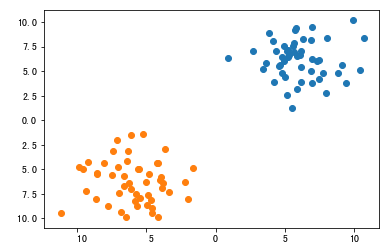

In [119]:
plt.scatter(*zip(*label_a))
plt.scatter(*zip(*label_b))

In [120]:
label_a_x = label_a[:, 0]

In [122]:
label_b_x = label_b[:, 0]

In [123]:
k_and_b = []

In [126]:
def f(x, k, b):
    return k * x - b

In [127]:
for i in range(100):
    k, b = (np.random.random(size=(1, 2)) * 10 - 5)[0]
    
    if np.max(f(label_a_x, k, b)) <= -1 and np.min(f(label_b_x, k, b)) >= 1:
        print('find: {}, {}'.format(k, b))
        k_and_b.append((k, b))

find: -2.018182340053433, -0.7150528884447391
find: -2.3543885090184236, 2.6344400878313445
find: -3.089849927111924, -1.480324010307188
find: -1.7265244084629847, 0.15427965047441639
find: -4.261434295963036, -2.5388275029231133
find: -3.87760209705169, 2.9309555529506017
find: -1.6149928600610854, 1.0126830044146011
find: -3.2089404431121613, 0.3260697738877134
find: -3.759472312849863, 0.6060606763715883
find: -3.6741871127132386, 3.095475709057144
find: -4.8137422449682745, -1.0403443987864258
find: -2.604538363169193, 2.9712242456331293
find: -2.3836022491613007, 0.5380734158672542
find: -3.3268391356570537, 1.7171699181914555
find: -4.615942253645077, -1.7034300713757853
find: -4.723309006889113, -0.801116918201342
find: -4.015992112009519, -0.514079494600443
find: -4.830732868035356, 1.2348830683717607
find: -3.9578971627956117, 1.1975356678755054


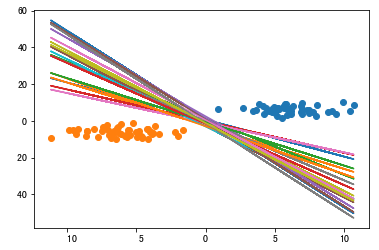

In [129]:
plt.scatter(*zip(*label_a))
plt.scatter(*zip(*label_b))

for k, b in k_and_b:
    x = np.concatenate((label_a_x, label_b_x))
    plt.plot(x, f(x, k, b))

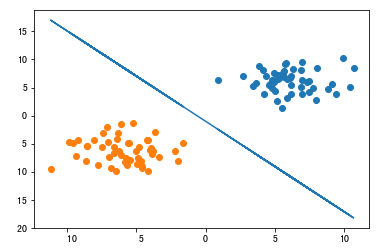

In [133]:
plt.scatter(*zip(*label_a))
plt.scatter(*zip(*label_b))

k, b = sorted(k_and_b, key=lambda t: abs(t[0]))[0]
x = np.concatenate((label_a_x, label_b_x))
plt.plot(x, f(x, k, b))

## 计算机解决问题的时候： 


1. 概率问题
2. 微积分
3. 几何 